In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [21]:
df = pd.read_excel('../data/food_base_result.xlsx',index_col= 0)

In [22]:
df.head()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B1,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source
색인,,,,,,,,,,,,,,,,,,,,,
1,A001001A010a,"귀리, 겉귀리, 도정, 생것",332,9.4,11.4,3.7,2,73.5,-,-,...,0.13,0.21,2.3,-,-,-,-,-,0,농진청('93)
2,A001002A010a,"귀리, 쌀귀리, 도정, 생것",334,9.7,14.3,3.8,1.8,70.4,-,-,...,0.15,0.46,2.2,-,-,-,-,-,0,농진청('93)
3,A0020000009a,"귀리, 오트밀",348,12,13.2,8.2,1.7,64.9,-,18.8,...,-,0.07,1.1,-,-,-,-,-,tr,농진청('11)
4,A003000A010a,"기장, 도정, 생것",360,11.3,11.2,1.9,1,74.6,-,-,...,0.42,0.09,2.9,-,-,-,-,-,0,농진청('06)
5,A003001A010a,"기장, 찰기장, 도정, 생것",365,11.3,12.46,3.09,1.24,71.91,0,4.6,...,0.417,0.078,2.213,0,0.009,0,26,0,0,농진청('13)


In [23]:
food_code = df['식품코드'].tolist()

In [24]:
food_dic = { 'A' : '곡류', 'B':'감자류 및 전분류', 'C':'당류', 'D':'두류', 'E':'견과류 및 종실류',
            'F': '채소류', 'G':'버섯류', 'H':'과일류','I':'육류', 'J':'난류', 'K':'어류',
            'L':'해조류', 'M':'우유 및 유제품류', 'N':'유지류','O' : '차류','P': '음료류',
            'Q': '주류','R': '조미료류','S': '조리가공식품류','T': '기타'}

In [25]:
food_group = []
for i, code in enumerate(food_code):
    if food_dic[code[0]]:
        food_group.append(food_dic[code[0]])
        #print(i, food_dic[code[0]])

In [26]:
df['식품군'] = food_group
df.head()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source,식품군
색인,,,,,,,,,,,,,,,,,,,,,
1,A001001A010a,"귀리, 겉귀리, 도정, 생것",332,9.4,11.4,3.7,2,73.5,-,-,...,0.21,2.3,-,-,-,-,-,0,농진청('93),곡류
2,A001002A010a,"귀리, 쌀귀리, 도정, 생것",334,9.7,14.3,3.8,1.8,70.4,-,-,...,0.46,2.2,-,-,-,-,-,0,농진청('93),곡류
3,A0020000009a,"귀리, 오트밀",348,12,13.2,8.2,1.7,64.9,-,18.8,...,0.07,1.1,-,-,-,-,-,tr,농진청('11),곡류
4,A003000A010a,"기장, 도정, 생것",360,11.3,11.2,1.9,1,74.6,-,-,...,0.09,2.9,-,-,-,-,-,0,농진청('06),곡류
5,A003001A010a,"기장, 찰기장, 도정, 생것",365,11.3,12.46,3.09,1.24,71.91,0,4.6,...,0.078,2.213,0,0.009,0,26,0,0,농진청('13),곡류


In [27]:
df.columns

Index(['식품코드', '식품명', '에너지', '수분', '단백질', '지질', '회분', '탄수\n화물', '총 당류',
       '총 \n식이섬유', '총 ', '필수 ', '비필수 ', '총', '총 필수', '총 포화 ', '총 단일\n불포화',
       '총 다중\n불포화', '스테롤', '상당량', 'ref', '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨',
       '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드', '레티놀', '베타카로틴', '비타민 D',
       '비타민 E', '비타민 K1', '비타민 B1', '비타민 B2', '니아신', '판토텐산', '비타민 B6', '비오틴',
       '엽산\n(DFE)', '비타민 B12', '비타민 C', 'source', '식품군'],
      dtype='object')

In [28]:
df['amount'] = 100

In [29]:
df = df[['식품코드','식품군', '식품명', 'amount', '에너지', '수분', '단백질', '지질', '회분', '탄수\n화물', '총 당류',
       '총 \n식이섬유', '총 ', '필수 ', '비필수 ', '총', '총 필수', '총 포화 ', '총 단일\n불포화',
       '총 다중\n불포화', '스테롤', '상당량', 'ref', '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨',
       '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드', '레티놀', '베타카로틴', '비타민 D',
       '비타민 E', '비타민 K1', '비타민 B1', '비타민 B2', '니아신', '판토텐산', '비타민 B6', '비오틴',
       '엽산\n(DFE)', '비타민 B12', '비타민 C', 'source' ]]

In [19]:
df.columns = ['식품코드','식품군', '식품명', 'amount', '에너지', '수분', '단백질', '지질', '회분', '탄수\n화물', '총 당류',
       '총 \n식이섬유', '총 ', '필수 ', '비필수 ', '총', '총 필수', '총 포화 ', '총 단일\n불포화',
       '총 다중\n불포화', '스테롤', '상당량', 'ref', '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨',
       '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드', '레티놀', '베타카로틴', '비타민 D',
       '비타민 E', '비타민 K1', '비타민 B1', '비타민 B2', '니아신', '판토텐산', '비타민 B6', '비오틴',
       '엽산\n(DFE)', '비타민 B12', '비타민 C', 'source' ]

In [30]:
df.head()

,식품코드,식품군,식품명,amount,에너지,수분,단백질,지질,회분,탄수 화물,...,비타민 B1,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source
색인,,,,,,,,,,,,,,,,,,,,,
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",100,332,9.4,11.4,3.7,2,73.5,...,0.13,0.21,2.3,-,-,-,-,-,0,농진청('93)
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",100,334,9.7,14.3,3.8,1.8,70.4,...,0.15,0.46,2.2,-,-,-,-,-,0,농진청('93)
3,A0020000009a,곡류,"귀리, 오트밀",100,348,12,13.2,8.2,1.7,64.9,...,-,0.07,1.1,-,-,-,-,-,tr,농진청('11)
4,A003000A010a,곡류,"기장, 도정, 생것",100,360,11.3,11.2,1.9,1,74.6,...,0.42,0.09,2.9,-,-,-,-,-,0,농진청('06)
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",100,365,11.3,12.46,3.09,1.24,71.91,...,0.417,0.078,2.213,0,0.009,0,26,0,0,농진청('13)


In [31]:
df.to_excel('../output/main_result.xlsx')

# 식품군 개수를 분석해본다

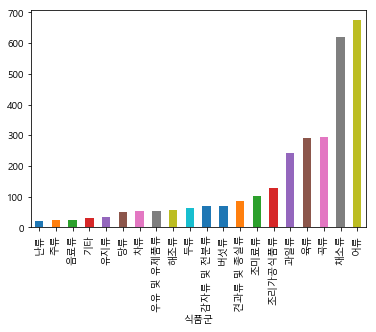

In [11]:
food_group_count = df.groupby(df['식품군']).size()
food_group_count = food_group_count.sort_values()
food_group_count.plot.bar()

In [12]:
food_group_count = pd.DataFrame(food_group_count, columns=['식품군'])
food_group_count

,식품군
식품군,
난류,22
주류,25
음료류,25
기타,30
유지류,34
당류,50
차류,54
우유 및 유제품류,55
해조류,57


In [14]:
import os
dir_name = '../output/'
if not os.path.isdir(dir_name):
    os.mkdir('../output/')
else : 
    pass
food_group_count.to_excel('../output/group_count.xlsx')

# 각 식품군 분리하기 
- 2010년 주달래 교수님의 발표자료를 기준으로 식품교환표의 식품군을 묶음


1. 곡류군 : 곡류 및 그 제품, 감자 및 전분류
2. 어육류군 : 두류 및 그제품, 육류 및 그 제품, 난류, 어패류
3. 채소군 : 해조류, 버섯류, 채소류
4. 과일군 : 과실류
5. 지방군 : 유지류, 종실류 및 그 제품
6. 우유군 : 우유 및 유제품

In [32]:
result = df[['식품코드','식품군','식품명','amount','에너지','탄수\n화물','단백질','지질']]

In [33]:
result.head()

,식품코드,식품군,식품명,amount,에너지,탄수 화물,단백질,지질
색인,,,,,,,,
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",100,332,73.5,11.4,3.7
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",100,334,70.4,14.3,3.8
3,A0020000009a,곡류,"귀리, 오트밀",100,348,64.9,13.2,8.2
4,A003000A010a,곡류,"기장, 도정, 생것",100,360,74.6,11.2,1.9
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",100,365,71.91,12.46,3.09


In [35]:
gokryu = []
beef = []
vegitable = []
fruits = []
fatty = []
milk = []

for i,data in enumerate(result['식품군']):
    #곡류군
    if data == '곡류':
        gokryu.append(result.iloc[i])
    elif data == '감자류 및 전분류':
        gokryu.append(result.iloc[i])
        
    #어육류군
    elif data =='난류':
        beef.append(result.iloc[i])
    elif data == '어류':
        beef.append(result.iloc[i])
    elif data == '육류':
        beef.append(result.iloc[i])
    elif data == '두류':
        beef.append(result.iloc[i])
        
    # 채소군
    elif data =='채소류':
        vegitable.append(result.iloc[i])
    elif data == '버섯류':
        vegitable.append(result.iloc[i])
    elif data == '해조류':
        vegitable.append(result.iloc[i])
        
    # 과일군 
    elif data =='과일류':
        fruits.append(result.iloc[i])
        
    # 지방군 
    elif data == '유지류':
        fatty.append(result.iloc[i])
    elif data == '견과류 및 종실류':
        fatty.append(result.iloc[i])
                                 
    #우유군
    elif data == '우유 및 유제품류':
        milk.append(result.iloc[i])
   
        
# 데이터프레임 안들기
gokryu_frame = pd.DataFrame(gokryu)
beef_frame = pd.DataFrame(beef)
fruits_frame = pd.DataFrame(fruits)
vegitable_frame = pd.DataFrame(vegitable)
fatty_frame = pd.DataFrame(fatty)        
milk_frame = pd.DataFrame(milk)

# 인덱스 초기화 
gokryu_frame = gokryu_frame.reset_index()
beef_frame = beef_frame.reset_index()
fruits_frame = fruits_frame.reset_index()
vegitable_frame = vegitable_frame.reset_index()
fatty_frame = fatty_frame.reset_index()
milk_frame = milk_frame.reset_index()

# 인덱스 삭제
del gokryu_frame['index']
del beef_frame['index']
del fruits_frame['index']
del vegitable_frame['index']
del fatty_frame['index']
del milk_frame['index']

# 컬럼 재 정렬 
gokryu_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']
beef_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']
fruits_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']
vegitable_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']
fatty_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']
milk_frame.columns = ['code', 'group', 'name', 'amount', 'kcal', 'carbohydrate','protein', 'fat']

# 데이터 베이스 함정카드 제거 
gokryu_frame['carbohydrate'] = gokryu_frame['carbohydrate'].replace('tr',0)
gokryu_frame['protein'] = gokryu_frame['protein'].replace('tr',0)
gokryu_frame['fat'] = gokryu_frame['fat'].replace('tr',0)
gokryu_frame['carbohydrate'] = gokryu_frame['carbohydrate'].replace('Tr',0)
gokryu_frame['protein'] = gokryu_frame['protein'].replace('Tr',0)
gokryu_frame['fat'] = gokryu_frame['fat'].replace('Tr',0)
gokryu_frame['carbohydrate'] = gokryu_frame['carbohydrate'].replace('-',0)
gokryu_frame['protein'] = gokryu_frame['protein'].replace('-',0)
gokryu_frame['fat'] = gokryu_frame['fat'].replace('-',0)
gokryu_frame['carbohydrate'] = gokryu_frame['carbohydrate'].astype(float)
gokryu_frame['protein'] = gokryu_frame['protein'].astype(float)
gokryu_frame['fat'] = gokryu_frame['fat'].astype(float)

beef_frame['carbohydrate'] = beef_frame['carbohydrate'].replace('tr',0)
beef_frame['protein'] = beef_frame['protein'].replace('tr',0)
beef_frame['fat'] = beef_frame['fat'].replace('tr',0)
beef_frame['carbohydrate'] = beef_frame['carbohydrate'].replace('Tr',0)
beef_frame['protein'] = beef_frame['protein'].replace('Tr',0)
beef_frame['fat'] = beef_frame['fat'].replace('Tr',0)
beef_frame['carbohydrate'] = beef_frame['carbohydrate'].replace('-',0)
beef_frame['protein'] = beef_frame['protein'].replace('-',0)
beef_frame['fat'] = beef_frame['fat'].replace('-',0)
beef_frame['carbohydrate'] = beef_frame['carbohydrate'].astype(float)
beef_frame['protein'] = beef_frame['protein'].astype(float)
beef_frame['fat'] = beef_frame['fat'].astype(float)

fruits_frame['carbohydrate'] = fruits_frame['carbohydrate'].replace('tr',0)
fruits_frame['protein'] = fruits_frame['protein'].replace('tr',0)
fruits_frame['fat'] = fruits_frame['fat'].replace('tr',0)
fruits_frame['carbohydrate'] = fruits_frame['carbohydrate'].replace('Tr',0)
fruits_frame['protein'] = fruits_frame['protein'].replace('Tr',0)
fruits_frame['fat'] = fruits_frame['fat'].replace('Tr',0)
fruits_frame['carbohydrate'] = fruits_frame['carbohydrate'].replace('-',0)
fruits_frame['protein'] = fruits_frame['protein'].replace('-',0)
fruits_frame['fat'] = fruits_frame['fat'].replace('-',0)
fruits_frame['carbohydrate'] = fruits_frame['carbohydrate'].astype(float)
fruits_frame['protein'] = fruits_frame['protein'].astype(float)
fruits_frame['fat'] = fruits_frame['fat'].astype(float)

vegitable_frame['carbohydrate'] = vegitable_frame['carbohydrate'].replace('tr',0)
vegitable_frame['protein'] = vegitable_frame['protein'].replace('tr',0)
vegitable_frame['fat'] = vegitable_frame['fat'].replace('tr',0)
vegitable_frame['carbohydrate'] = vegitable_frame['carbohydrate'].replace('Tr',0)
vegitable_frame['protein'] = vegitable_frame['protein'].replace('Tr',0)
vegitable_frame['fat'] = vegitable_frame['fat'].replace('Tr',0)
vegitable_frame['carbohydrate'] = vegitable_frame['carbohydrate'].replace('-',0)
vegitable_frame['protein'] = vegitable_frame['protein'].replace('-',0)
vegitable_frame['fat'] = vegitable_frame['fat'].replace('-',0)
vegitable_frame['carbohydrate'] = vegitable_frame['carbohydrate'].astype(float)
vegitable_frame['protein'] = vegitable_frame['protein'].astype(float)
vegitable_frame['fat'] = vegitable_frame['fat'].astype(float)

fatty_frame['carbohydrate'] = fatty_frame['carbohydrate'].replace('tr',0)
fatty_frame['protein'] = fatty_frame['protein'].replace('tr',0)
fatty_frame['fat'] = fatty_frame['fat'].replace('tr',0)
fatty_frame['carbohydrate'] = fatty_frame['carbohydrate'].replace('Tr',0)
fatty_frame['protein'] = fatty_frame['protein'].replace('Tr',0)
fatty_frame['fat'] = fatty_frame['fat'].replace('Tr',0)
fatty_frame['carbohydrate'] = fatty_frame['carbohydrate'].replace('-',0)
fatty_frame['protein'] = fatty_frame['protein'].replace('-',0)
fatty_frame['fat'] = fatty_frame['fat'].replace('-',0)
fatty_frame['carbohydrate'] = fatty_frame['carbohydrate'].astype(float)
fatty_frame['protein'] = fatty_frame['protein'].astype(float)
fatty_frame['fat'] = fatty_frame['fat'].astype(float)

milk_frame['carbohydrate'] = milk_frame['carbohydrate'].replace('tr',0)
milk_frame['protein'] = milk_frame['protein'].replace('tr',0)
milk_frame['fat'] = milk_frame['fat'].replace('tr',0)
milk_frame['carbohydrate'] = milk_frame['carbohydrate'].replace('Tr',0)
milk_frame['protein'] = milk_frame['protein'].replace('Tr',0)
milk_frame['fat'] = milk_frame['fat'].replace('Tr',0)
milk_frame['carbohydrate'] = milk_frame['carbohydrate'].replace('-',0)
milk_frame['protein'] = milk_frame['protein'].replace('-',0)
milk_frame['fat'] = milk_frame['fat'].replace('-',0)
milk_frame['carbohydrate'] = milk_frame['carbohydrate'].astype(float)
milk_frame['protein'] = milk_frame['protein'].astype(float)
milk_frame['fat'] = milk_frame['fat'].astype(float)

# 엑셀 추출 
gokryu_frame.to_excel('../output/gokryu.xlsx')
beef_frame.to_excel('../output/beef.xlsx')
fruits_frame.to_excel('../output/fruits.xlsx')
vegitable_frame.to_excel('../output/vegitable.xlsx')
fatty_frame.to_excel('../output/fatty.xlsx')
milk_frame.to_excel('../output/milk.xlsx')